In [121]:
import numpy as np              #for arranging the data
import pandas as pd             #for reading the data from csv file
import os
import cv2                      #for reading and processing the image


In [120]:
from sklearn.decomposition import PCA                   #PCA

# PREPROCESSING THE DATA

In [3]:
X = []
Y = []

X_unlabelled = []


main_folder = r"D:\AI\epoch learning phase tasks\archive (3)\lfw-deepfunneled\lfw-deepfunneled"

loading and saving the unlabelled data as an numpy array of shape (13000,4096) after reshaping

In [4]:
for image_folder_name in os.listdir(main_folder):
    image_path = os.path.join(main_folder,image_folder_name)

    for images in os.listdir(image_path):
        final_path = os.path.join(image_path,images)

        img = cv2.imread(final_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(48,48))
        img = img.astype(np.float32)/255


        X_unlabelled.append(img)


In [123]:
print(X_unlabelled)
X_unlabelled = np.array(X_unlabelled)
X_unlabelled = X_unlabelled.reshape(X_unlabelled.shape[0],-1)
print(X_unlabelled)

[[-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 ...
 [-0.01996591 -0.07339516 -0.09646338 ... -0.12631188 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.00474325 -0.09895357
  -0.08426113]
 [-0.0082012  -0.02633633 -0.03371829 ... -0.0988609  -0.07542415
  -0.076418  ]]
[[-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.13415502 -0.11071827
  -0.0881827 ]
 ...
 [-0.01996591 -0.07339516 -0.09646338 ... -0.12631188 -0.11071827
  -0.0881827 ]
 [-0.07486787 -0.09692457 -0.11999279 ... -0.00474325 -0.09895357
  -0.08426113]
 [-0.0082012  -0.02633633 -0.03371829 ... -0.0988609  -0.07542415
  -0.076418  ]]


LOADING AND SAVING THE LABELLED DATA IN THE SIMILAR FORMAT

In [108]:
labelled_file = pd.read_csv(r"D:\AI\epoch learning phase tasks\archive (2)\ckextended.csv")
Y = labelled_file["emotion"].to_numpy()


X = labelled_file["pixels"].to_numpy()
X = np.array([np.fromstring(pixel_string,sep=" ") for pixel_string in X],dtype = np.float32)
X = X/255


print(X.shape,type(X))
print()
print(X)



(920, 2304) <class 'numpy.ndarray'>

[[0.14117648 0.15294118 0.13725491 ... 0.75686276 0.9843137  0.99215686]
 [0.34509805 0.2901961  0.07450981 ... 0.19607843 0.10588235 0.12941177]
 [0.03529412 0.00784314 0.01568628 ... 0.         0.         0.        ]
 ...
 [0.29803923 0.15686275 0.12156863 ... 0.32941177 0.33333334 0.34509805]
 [0.44705883 0.34117648 0.0627451  ... 1.         0.9882353  0.96862745]
 [0.39607844 0.4        0.3882353  ... 0.39215687 0.24313726 0.23137255]]


# PCA 


In [109]:
#VERY IMPORTANT -------->>> I FORGOT TO DO THE MEAN CENTERING OF THE DATA BEFORE DOING PCA ANALYSIS, DOING IT IS IMP SO THE AXES ARE PROPERLY ALIGNED AND NOT SHIFTED

mean_of_unlabelled = np.mean(X_unlabelled,axis=0)
X_unlabelled -= mean_of_unlabelled


#performing manual svd for interpreting values of k 
U,S,Vt = np.linalg.svd(X_unlabelled,full_matrices=False)

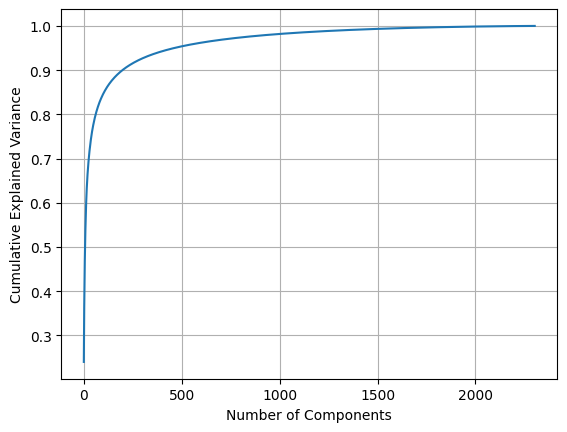

In [110]:
explained_variance = (S ** 2) / (X_unlabelled.shape[0] - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

import matplotlib.pyplot as plt
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

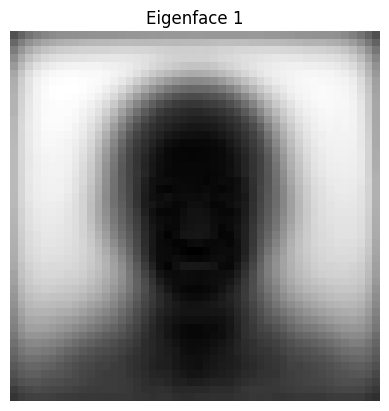

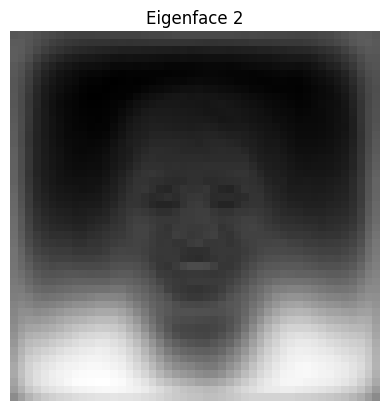

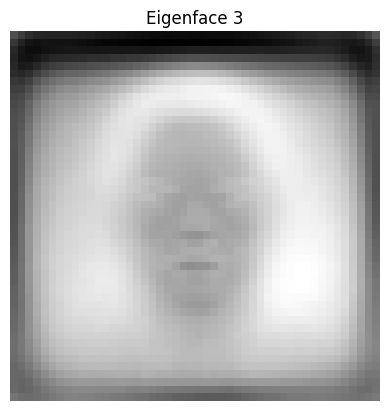

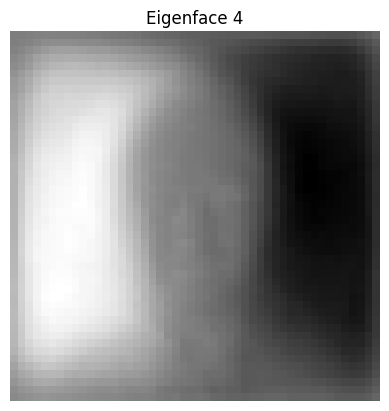

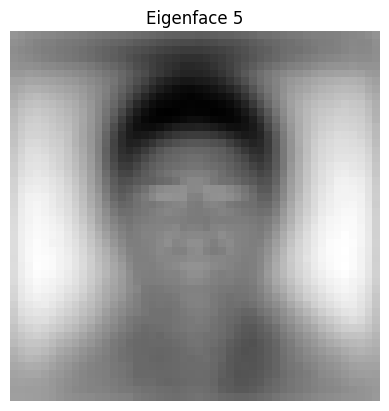

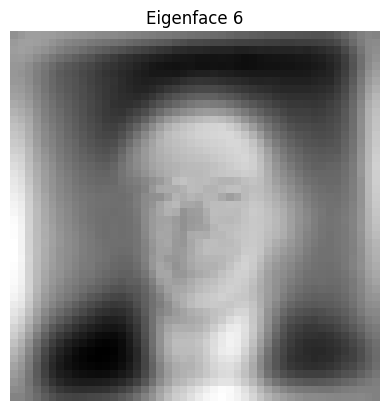

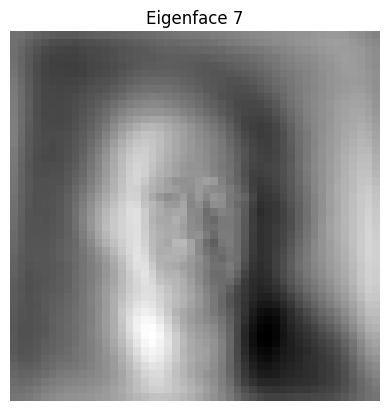

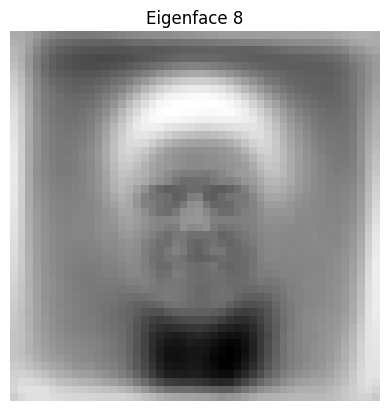

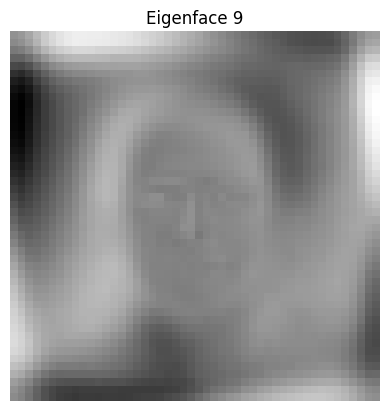

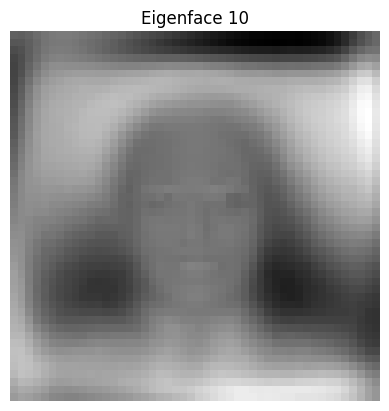

In [111]:
eigenfaces = Vt[:10]  # first 10 eigenfaces
for i in range(10):
    plt.imshow(eigenfaces[i].reshape(48,48), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
    plt.show()


In [112]:
#now we can perform pca


pca = PCA(200,svd_solver='randomized')
X_unlabelled_pca = pca.fit_transform(X_unlabelled)
print(pca.explained_variance_ratio_)

[0.23996663 0.07572915 0.04788002 0.04184746 0.03551314 0.02808989
 0.0258248  0.02260108 0.01986906 0.01828922 0.01682063 0.01509932
 0.01292705 0.01224173 0.01033052 0.00971777 0.0086369  0.00849547
 0.00779575 0.00682138 0.00647289 0.0063336  0.00583138 0.0054086
 0.00529106 0.0051409  0.00487399 0.00451476 0.00442547 0.00418715
 0.00401829 0.00395193 0.00383329 0.00374982 0.0035723  0.00350105
 0.0033654  0.00324602 0.0031721  0.00314708 0.00290714 0.00276361
 0.0027003  0.0026847  0.00258404 0.0024793  0.00242908 0.00224539
 0.00222205 0.00221589 0.00216226 0.00213268 0.00207994 0.00206852
 0.00198914 0.00196915 0.00185047 0.00181912 0.00175479 0.00173835
 0.00170508 0.00168743 0.00164746 0.0016301  0.0015877  0.00155253
 0.00152661 0.00145504 0.00144266 0.00142939 0.00139089 0.00138328
 0.00135611 0.0013473  0.00128874 0.00127703 0.00126532 0.00124792
 0.00121311 0.00120818 0.00119551 0.00116546 0.00112712 0.00111212
 0.00109691 0.00106594 0.001043   0.00103811 0.0010262  0.00101

# Now we will use the directions or the face space learned from the larger dataset to transfrom the smaller dataset into it and then perfomr SVM

In [113]:

# from collections import Counter


# # Step 2: Count the samples per class
# class_counts = Counter(Y)
# print("Original class distribution:", class_counts)

# # Step 3: Choose the minimum class count for balanced sampling
# min_count = min(class_counts.values())

# # Step 4: Collect min_count samples per class
# def create_balanced_subset(X, Y, samples_per_class):
#     X_balanced = []
#     Y_balanced = []
    
#     for cls in np.unique(Y):
#         indices = np.where(Y == cls)[0]
#         np.random.shuffle(indices)
#         selected = indices[:samples_per_class]
#         X_balanced.extend(X[selected])
#         Y_balanced.extend(Y[selected])
    
#     return np.array(X_balanced), np.array(Y_balanced)

# X_balanced, Y_balanced = create_balanced_subset(X, Y, min_count)

# X = X_balanced
# Y = Y_balanced


In [114]:
X = X - mean_of_unlabelled
X = pca.transform(X)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=40,stratify=Y)


svm_classifier = SVC(kernel='rbf',gamma=0.001 ,C=250)
svm_classifier.fit(X_train,Y_train)
acc = svm_classifier.score(X_test,Y_test)

print(acc)

Y_predict = svm_classifier.predict(X_test)

0.8840579710144928


In [117]:
label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral','Contempt']

accuracy = accuracy_score(Y_test, Y_predict)
print(f"✅ Overall Accuracy: {accuracy * 100:.4f}%")



print("📊 Classification Report:")
print(classification_report(Y_test, Y_predict, target_names=label_names))


✅ Overall Accuracy: 88.4058%
📊 Classification Report:
              precision    recall  f1-score   support

       Angry       0.54      0.54      0.54        13
     Disgust       0.86      0.67      0.75        18
        Fear       0.75      0.38      0.50         8
       Happy       0.90      0.90      0.90        21
         Sad       1.00      0.25      0.40         8
    Surprise       1.00      0.88      0.94        25
     Neutral       0.89      0.99      0.94       178
    Contempt       1.00      0.40      0.57         5

    accuracy                           0.88       276
   macro avg       0.87      0.63      0.69       276
weighted avg       0.89      0.88      0.87       276



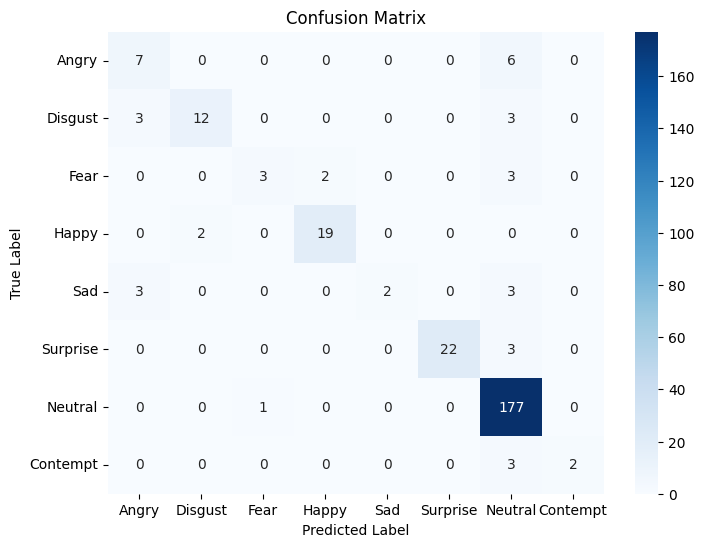

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, Y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
